<a href="https://colab.research.google.com/github/njokinjuguna/DjangoRestAPI/blob/main/CN7023part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing modules
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,BatchNormalization, Activation, Dropout
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.backend import epsilon

In [6]:
#import matplotlib for image processing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
#import confusion_matrix,plot_confusion_matrix




In [7]:
from keras.datasets import cifar10


In [8]:
#reading the dataset
(X_train, y_train), (X_test, y_test) =cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [9]:
#confirm the number of images in each set
X_train.shape
y_train.shape

(50000, 1)

In [10]:
#We divide the downloaded dataset to three namely - training, test and validation sets
X_train,X_val,y_train,y_val =train_test_split(X_train,y_train,test_size=.3)

In [11]:
#We dimension our dataset
print((X_train.shape, y_train.shape))
print((X_val.shape, y_val.shape))
print((X_test.shape, y_test.shape))


((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [12]:
#Hot encoding - converting our target varaibles and getting the number of categories/classes
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [13]:
def convolutional_deep_model():
    # We will now use the VGG19 as a deep convolutional neural network as a transfer learning model
    num_classes = y_train.shape[1]

    initial_model = VGG19(include_top=False,
                          weights='imagenet',
                          input_shape=(32, 32, 3),
                          classes=num_classes)

    # Define the Keras Sequential model with dense layers
    model = Sequential()
    model.add(initial_model)
    model.add(Flatten())
    #Add dense layers and RELU activation
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128,activation='relu'))
    #Adding dropouts neurons - regularization technique for neural network models
    model.add(Dropout(.3))
    model.add(Dense(num_classes,
    activation='softmax'))
    #Check model dimension
    model.summary()
    return model

#We build and train our model
model = convolutional_deep_model()

80134624/80134624 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                         

In [14]:
#define the hyperparameters for our model
batch_size = 100
epochs = 50
learn_rate = 0.01
adam = Adam(learning_rate=learn_rate,beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)
#optimizer = Adam(learning_rate=0.001)

In [15]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train,validation_data=(X_val, y_val),
steps_per_epoch = X_train.shape[0]//batch_size,
epochs=epochs, batch_size=batch_size,verbose=2)

Epoch 1/50
350/350 - 34s - loss: 2.4361 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.0975 - 34s/epoch - 96ms/step
Epoch 2/50
350/350 - 21s - loss: 2.3027 - accuracy: 0.1009 - val_loss: 2.3028 - val_accuracy: 0.0977 - 21s/epoch - 60ms/step
Epoch 3/50
350/350 - 21s - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.0977 - 21s/epoch - 60ms/step
Epoch 4/50
350/350 - 21s - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0987 - 21s/epoch - 61ms/step
Epoch 5/50
350/350 - 22s - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.0977 - 22s/epoch - 62ms/step
Epoch 6/50
350/350 - 22s - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3028 - val_accuracy: 0.0977 - 22s/epoch - 63ms/step
Epoch 7/50
350/350 - 22s - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3029 - val_accuracy: 0.0977 - 22s/epoch - 62ms/step
Epoch 8/50
350/350 - 22s - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0977 - 22s/epoch - 62ms/step


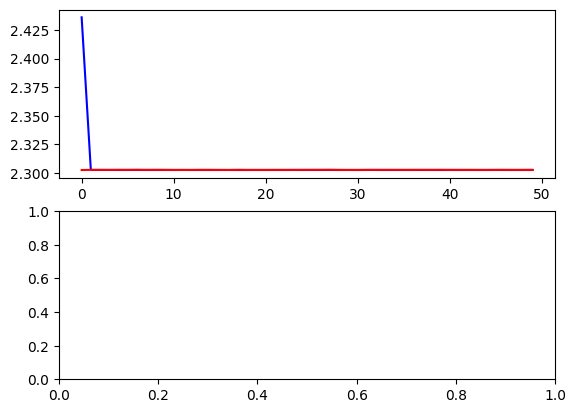

In [16]:
#Traning accuracy pf 94.59% loss 0.1952
#Plot the train and validation loss and accuracy
f,ax = plt.subplots(2,1)
#loss
ax[0].plot(model.history.history['loss'],color='b', label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r', label='Validation Loss')

In [17]:
#accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

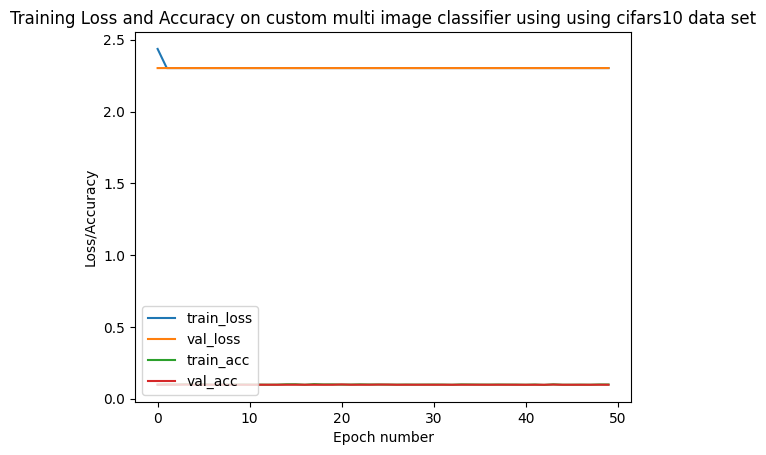

In [18]:
#Plotting the training loas and accuracy
plt.plot(np.arange(0, epochs),model.history.history["loss"],
label="train_loss")
plt.plot(np.arange(0, epochs),model.history.history["val_loss"],
label="val_loss")
plt.plot(np.arange(0, epochs),model.history.history["accuracy"],
label="train_acc")
plt.plot(np.arange(0, epochs),model.history.history["val_accuracy"],
label="val_acc")
plt.title("Training Loss and Accuracy on custom multi image classifier using using cifars10 data set")
plt.xlabel("Epoch number")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [19]:
#Make predictions with the model using the test data set
y_pred =np.argmax(model.predict(X_test),axis=1)
y_true = np.argmax(y_test,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))

313/313 [==============================] - 4s 10ms/step
Confusion Matrix
[[   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]]
